### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [2]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

In [58]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import inv
%matplotlib inline

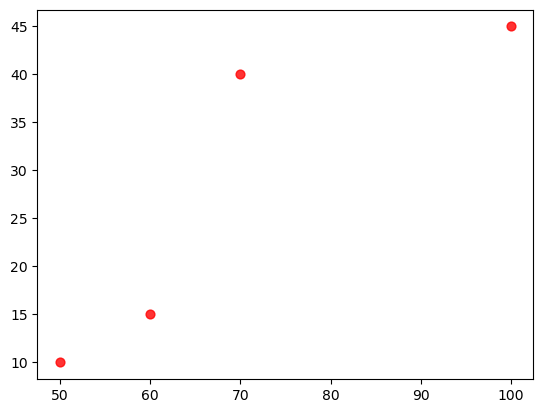

In [4]:
plt.scatter(x_hw, y_hw, 40, 'r', 'o', alpha=0.8)
plt.show()

In [55]:
#Матрица Х
mx = np.reshape(x_hw, (-1,1))
mx = np.insert(mx, 0,1, axis=-1)
mx

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [56]:
#Вектор У
my = np.reshape(y_hw, (-1,1))
my

array([[10],
       [15],
       [40],
       [45]])

$$
X^T\cdot X
$$

In [57]:
xtx = (mx.T).dot(mx)
xtx

array([[    4,   280],
       [  280, 21000]])

$$
\left(X^TX\right)^{-1}
$$

In [59]:
xtxinvered = inv(xtx)
xtxinvered

array([[ 3.75000000e+00, -5.00000000e-02],
       [-5.00000000e-02,  7.14285714e-04]])

$$
\left(X^TX\right)^{-1}X^TY
$$

In [60]:
W = xtxinvered.dot(mx.T).dot(my)

print("w0=%.5f, w1=%.3f" % (W[0][0],W[1][0]))

w0=-22.50000, w1=0.714


In [61]:
margin = 10
X_min = 20
X_max = mx[:,1].max()+margin
X_support = np.linspace(X_min, X_max, num=100)
Y_model = W[0][0] + W[1][0]*X_support
Y_model

array([-8.21428571, -7.56493506, -6.91558442, -6.26623377, -5.61688312,
       -4.96753247, -4.31818182, -3.66883117, -3.01948052, -2.37012987,
       -1.72077922, -1.07142857, -0.42207792,  0.22727273,  0.87662338,
        1.52597403,  2.17532468,  2.82467532,  3.47402597,  4.12337662,
        4.77272727,  5.42207792,  6.07142857,  6.72077922,  7.37012987,
        8.01948052,  8.66883117,  9.31818182,  9.96753247, 10.61688312,
       11.26623377, 11.91558442, 12.56493506, 13.21428571, 13.86363636,
       14.51298701, 15.16233766, 15.81168831, 16.46103896, 17.11038961,
       17.75974026, 18.40909091, 19.05844156, 19.70779221, 20.35714286,
       21.00649351, 21.65584416, 22.30519481, 22.95454545, 23.6038961 ,
       24.25324675, 24.9025974 , 25.55194805, 26.2012987 , 26.85064935,
       27.5       , 28.14935065, 28.7987013 , 29.44805195, 30.0974026 ,
       30.74675325, 31.3961039 , 32.04545455, 32.69480519, 33.34415584,
       33.99350649, 34.64285714, 35.29220779, 35.94155844, 36.59

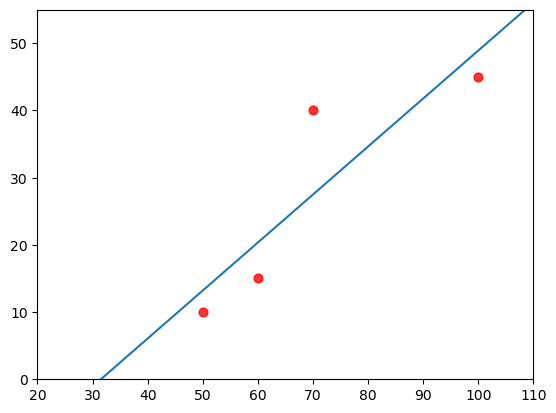

In [62]:
plt.xlim(X_min, X_max)
plt.ylim(0, my[:,0].max() + margin)
plt.scatter(mx[:,1], my[:,0], 40, 'r', 'o', alpha=0.8)
plt.plot(X_support, Y_model)

plt.show()